In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns' , None)

In [2]:
# load dataset
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Analysis

IN this section we are going to discuss:
1. Missing value 
2. Relationship of missing value with the target variable
2. Numberical variable(two types 1.discrete , 2. continuous)
3. seprate datatime variable from Numberical feature
4. distribution of variable wrt the target variable
5. categorical variable
6. cardinality of categorical variable

In [3]:
# missing values

feature_na =[feature for feature in data.columns if data[feature].isnull().sum()>0]

print("No. of columns having missing values:", len(feature_na))
print()
for feature in feature_na:
    print(feature,':' ,np.round(data[feature].isnull().mean() , 4) , '% missing value')

No. of columns having missing values: 19

LotFrontage : 0.1774 % missing value
Alley : 0.9377 % missing value
MasVnrType : 0.0055 % missing value
MasVnrArea : 0.0055 % missing value
BsmtQual : 0.0253 % missing value
BsmtCond : 0.0253 % missing value
BsmtExposure : 0.026 % missing value
BsmtFinType1 : 0.0253 % missing value
BsmtFinType2 : 0.026 % missing value
Electrical : 0.0007 % missing value
FireplaceQu : 0.4726 % missing value
GarageType : 0.0555 % missing value
GarageYrBlt : 0.0555 % missing value
GarageFinish : 0.0555 % missing value
GarageQual : 0.0555 % missing value
GarageCond : 0.0555 % missing value
PoolQC : 0.9952 % missing value
Fence : 0.8075 % missing value
MiscFeature : 0.963 % missing value


There are 19 columns with missing value, we are going to handle this value when we are going to do feature engineering

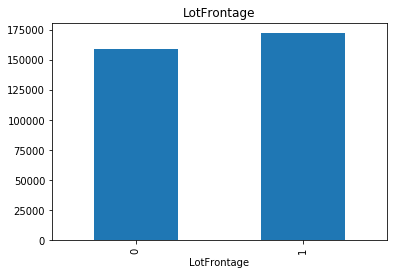

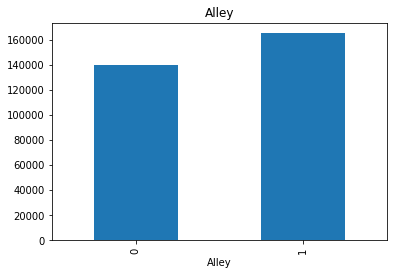

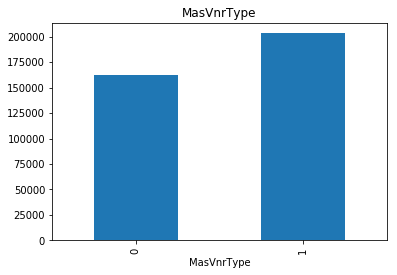

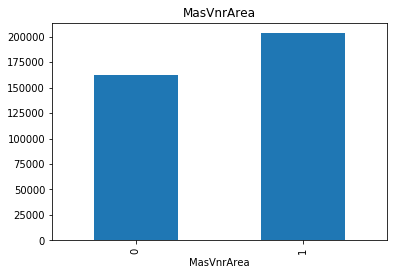

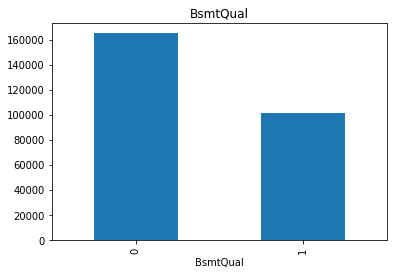

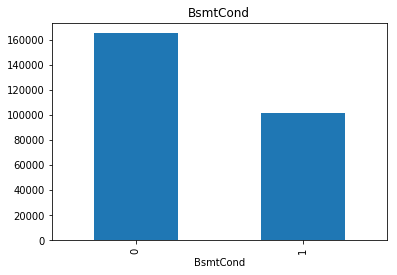

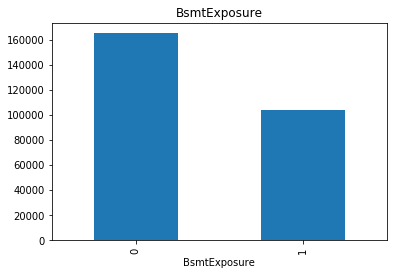

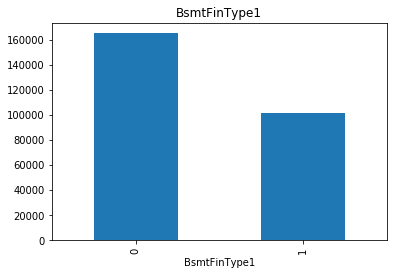

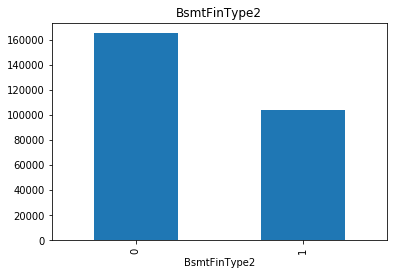

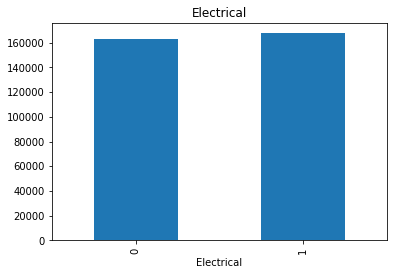

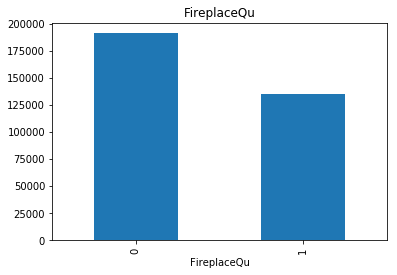

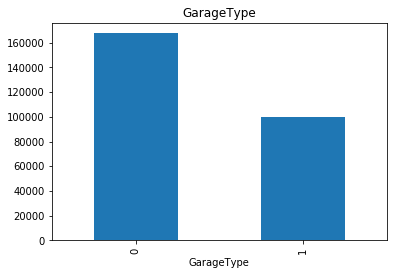

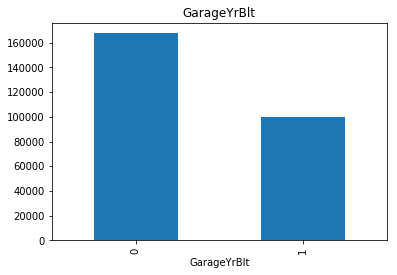

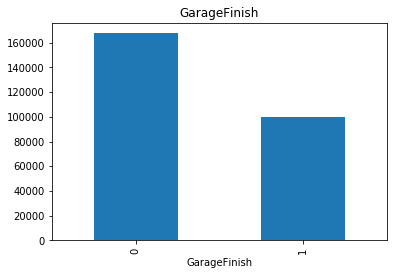

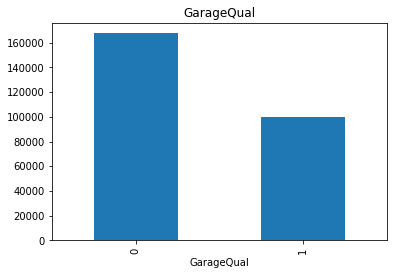

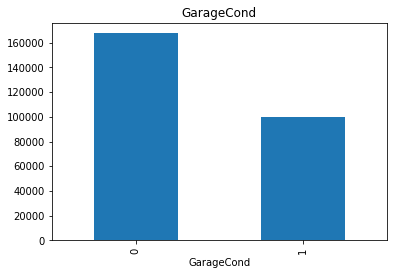

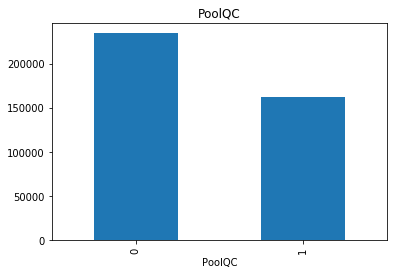

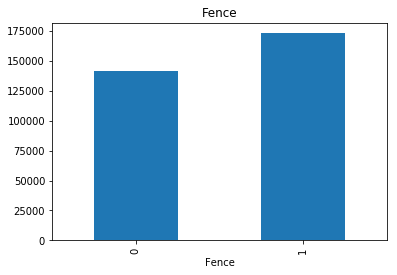

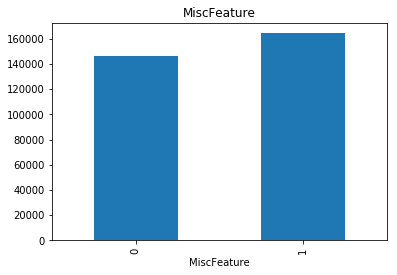

In [4]:
# relationship with target variable

for feature in feature_na:
    data = data.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

From the above graph we can see that if we did not include the NAN values then there is the difference in Sale Price.

In [5]:
# Numerical features

Numberical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print("Number of Numerical Columns :",len(Numberical_features))
data[Numberical_features].head()

Number of Numerical Columns : 54


,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,0,0,0,0,0,706,0,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,8,0,1,0,0,0,2,548,0,0,0,61,0,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,0,0,0,0,0,0,978,0,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,6,1,0,0,0,0,2,460,0,0,298,0,0,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,0,0,0,0,0,486,0,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,6,1,0,0,0,0,2,608,0,0,0,42,0,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,0,0,0,0,0,0,216,0,0,540,756,0,961,756,0,1717,1,0,1,0,3,1,7,1,0,0,0,0,3,642,0,0,0,35,272,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,0,0,0,0,0,655,0,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,9,1,0,0,0,0,3,836,0,0,192,84,0,0,0,0,1,1,1,0,12,2008,250000


In [6]:
# datatime variable
Datetime_feature = [feature for feature in Numberical_features if 'Yr' in feature or 'Year' in feature]
print(Datetime_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


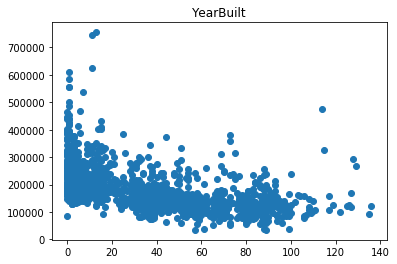

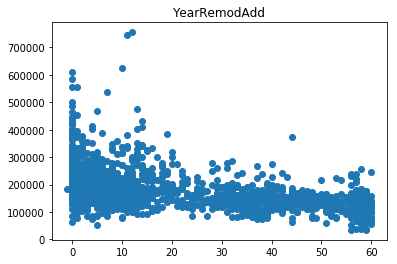

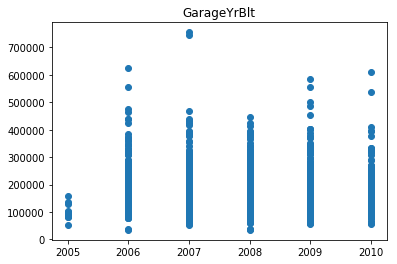

In [7]:
for feature in Datetime_feature:
    if feature != 'YrSold':
        data = data.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature] , data['SalePrice'])
        plt.title(feature)
        plt.show()

In [8]:
# discrete feature
discreate_feature = [feature for feature in Numberical_features if len(data[feature].unique()) < 25 and feature not in Datetime_feature + ['Id']]
len(discreate_feature)

35

In [9]:
data[discreate_feature].head()

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold
0,60,0,1,7,5,0,0,0,0,0,0,0,0,0,1,0,2,1,3,1,8,0,1,0,0,2,0,0,0,0,1,1,1,0,2
1,20,0,1,6,8,0,0,0,0,0,0,0,0,0,0,1,2,0,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,5
2,60,0,1,7,5,0,0,0,0,0,0,0,0,0,1,0,2,1,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,9
3,70,0,1,7,5,0,0,0,0,0,0,0,0,0,1,0,1,0,3,1,7,1,0,0,0,3,0,0,0,0,1,1,1,0,2
4,60,0,1,8,5,0,0,0,0,0,0,0,0,0,1,0,2,1,4,1,9,1,0,0,0,3,0,0,0,0,1,1,1,0,12


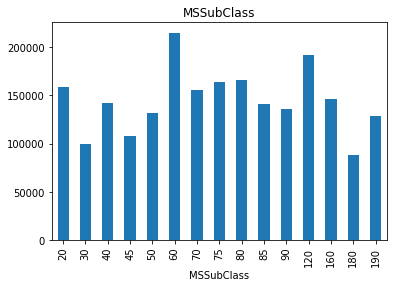

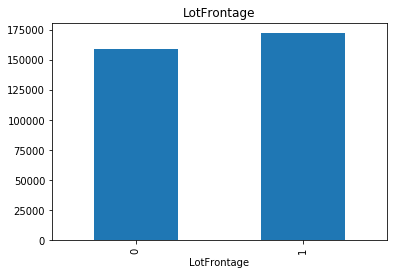

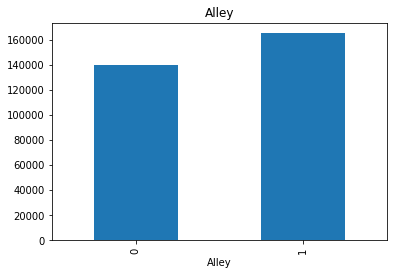

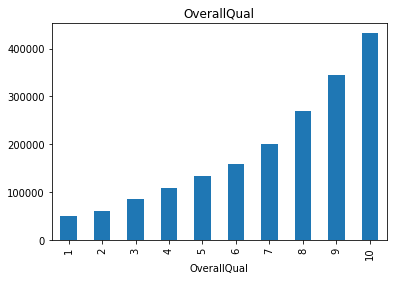

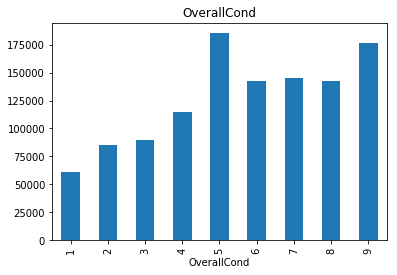

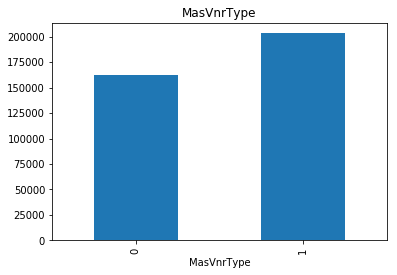

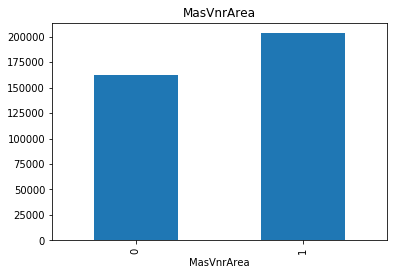

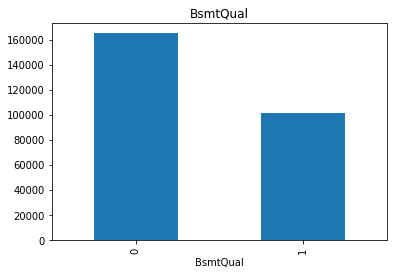

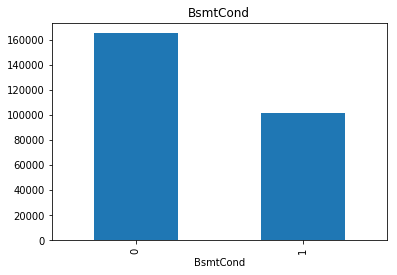

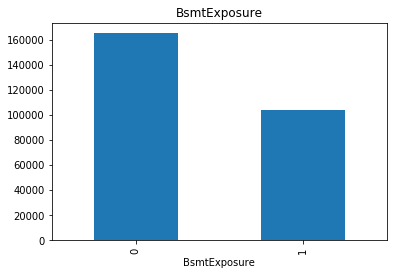

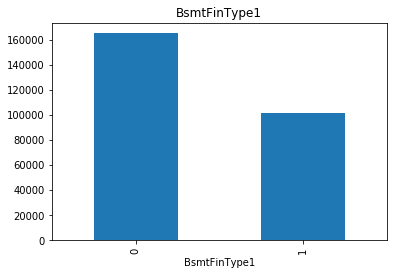

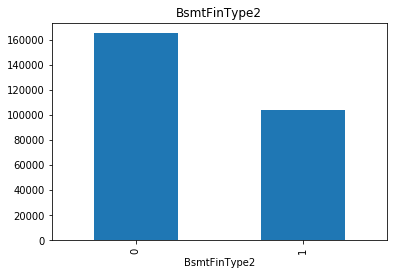

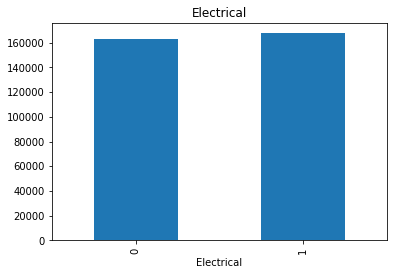

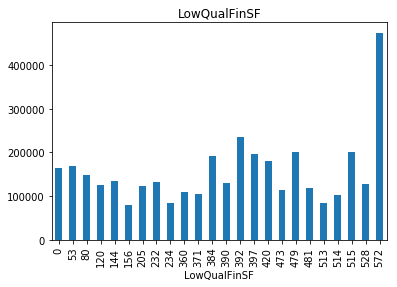

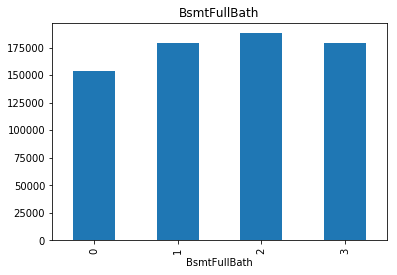

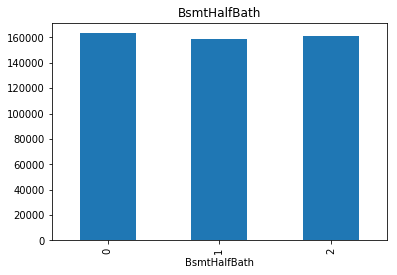

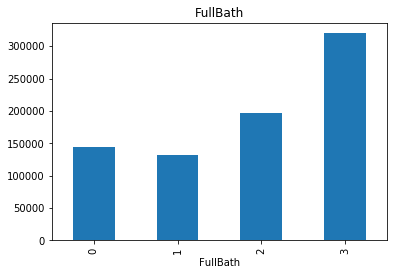

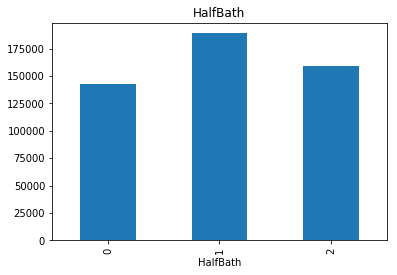

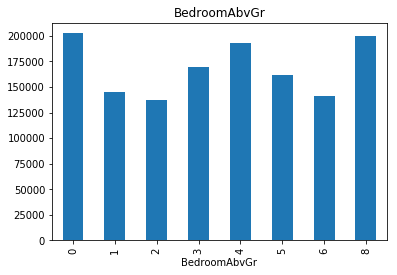

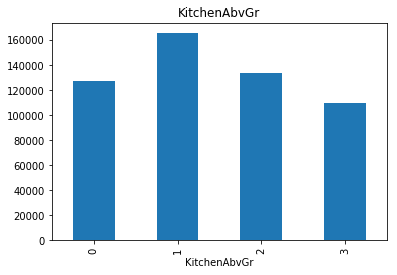

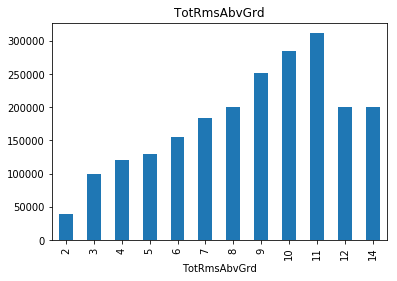

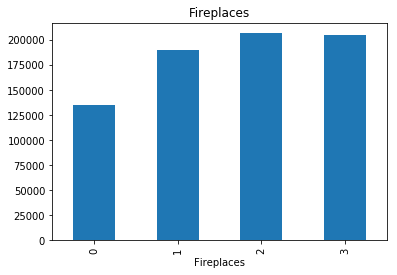

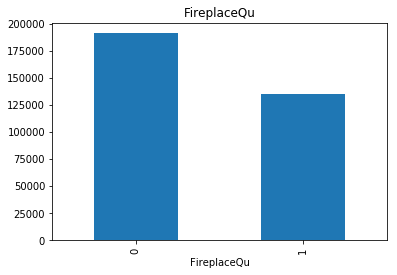

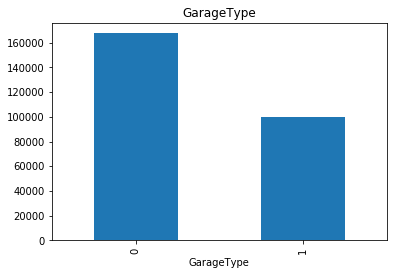

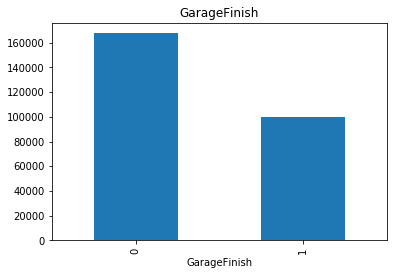

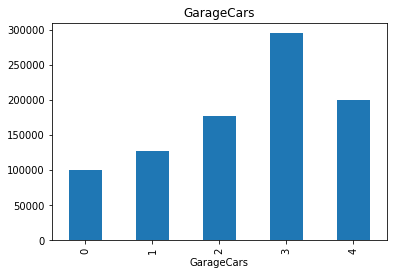

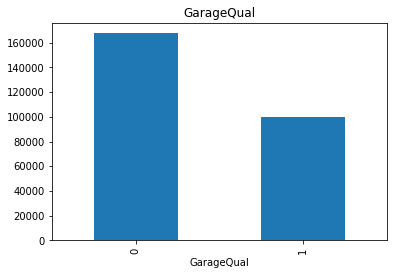

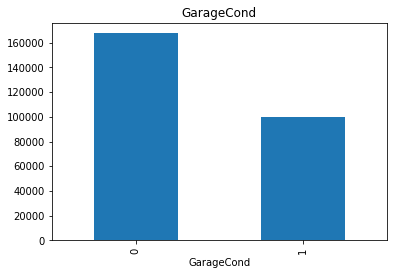

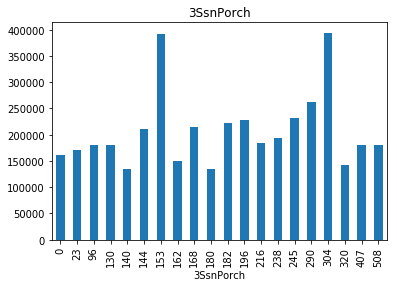

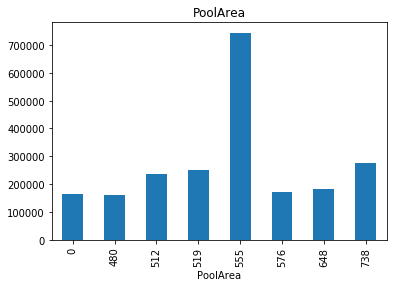

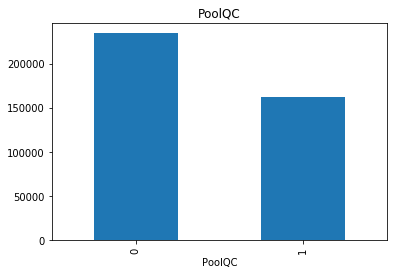

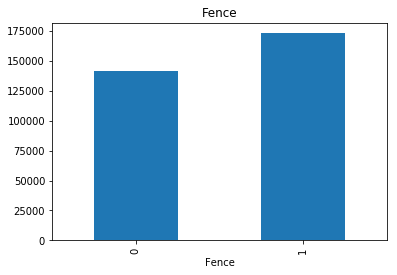

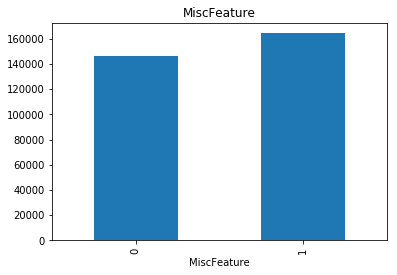

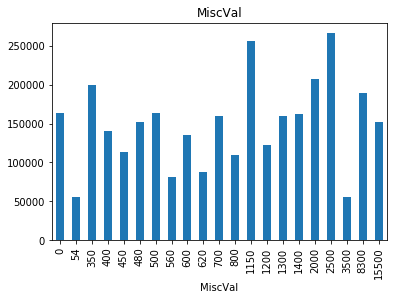

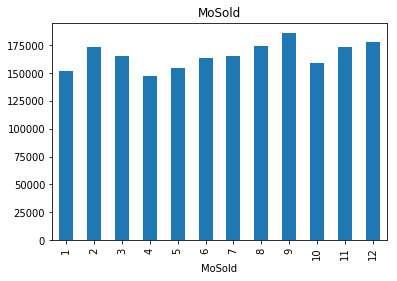

In [10]:
# distribution of discrete feature
for feature in discreate_feature:
    data = data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [11]:
# continuous variable
continuous_feature = [feature for feature in Numberical_features if feature not in discreate_feature + Datetime_feature + ['Id']]
print(continuous_feature)

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


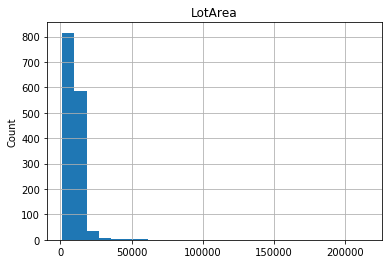

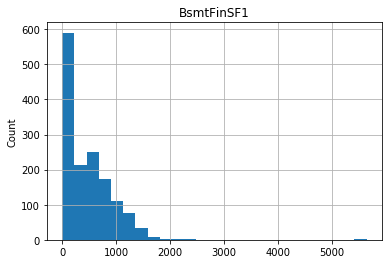

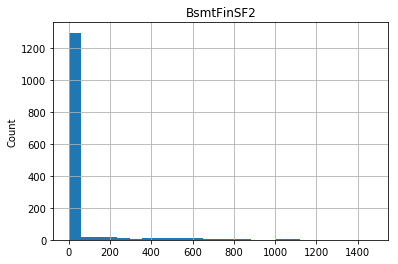

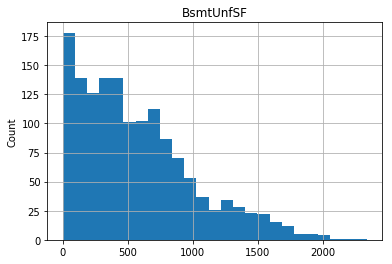

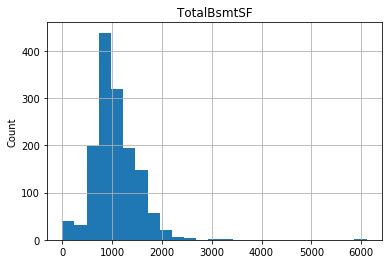

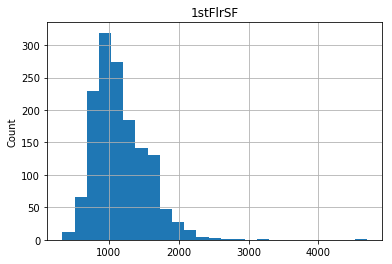

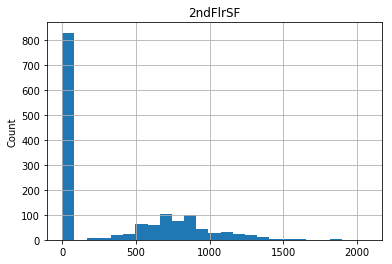

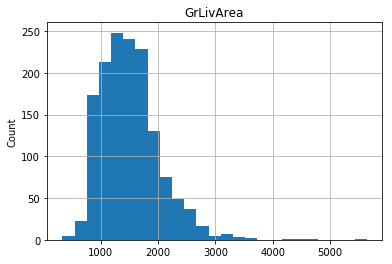

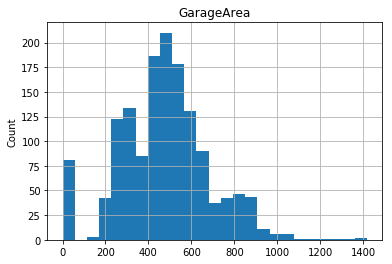

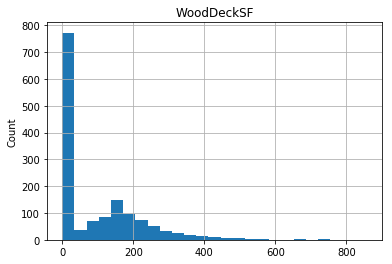

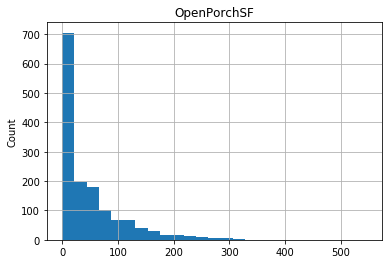

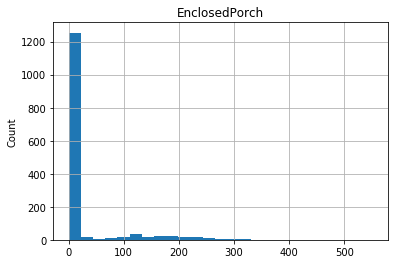

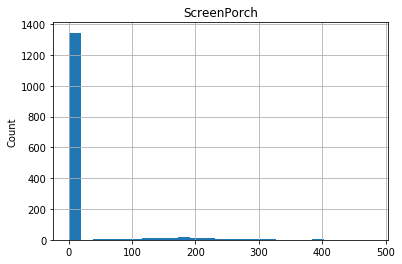

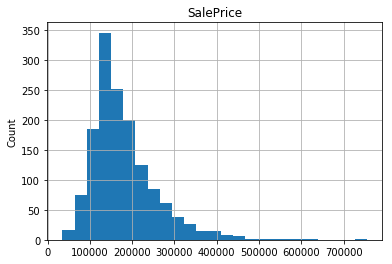

In [12]:
for feature in continuous_feature:
    data= data.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    plt.ylabel('Count')
    plt.show()

As we can see the continuous feature are skewed so we will be using log transformation to remove the skewness.

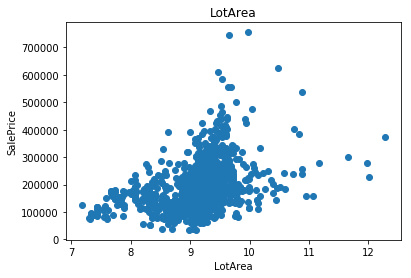

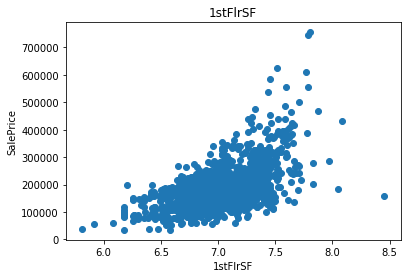

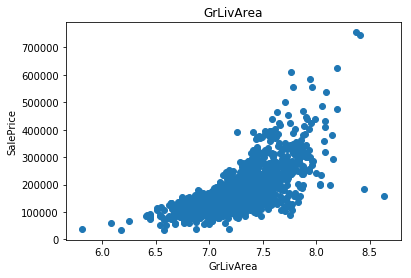

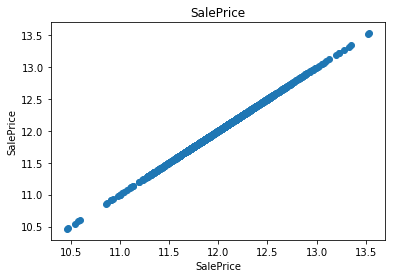

In [13]:
for feature in continuous_feature:
    data = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature] , data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

## Outliers

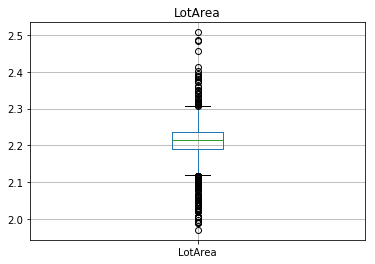

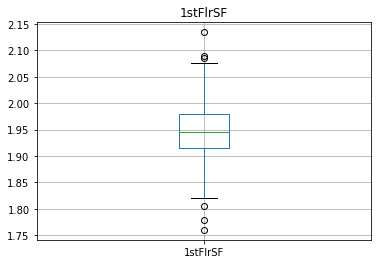

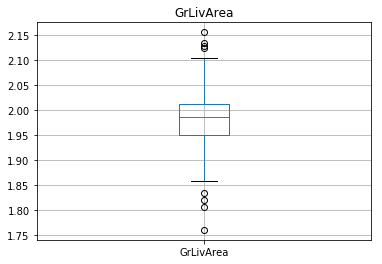

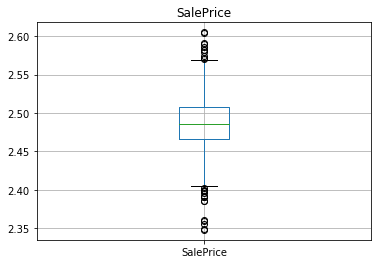

In [14]:
for feature in continuous_feature:
    data = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.title(feature)
        plt.show()

In [15]:
# catergorical feature

catergorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
len(catergorical_feature)

27

In [16]:
# cardinality

for feature in catergorical_feature:
    print('{} has {} subfeature'.format(feature , len(data[feature].unique())))

MSZoning has 5 subfeature
Street has 2 subfeature
LotShape has 4 subfeature
LandContour has 4 subfeature
Utilities has 2 subfeature
LotConfig has 5 subfeature
LandSlope has 3 subfeature
Neighborhood has 25 subfeature
Condition1 has 9 subfeature
Condition2 has 8 subfeature
BldgType has 5 subfeature
HouseStyle has 8 subfeature
RoofStyle has 6 subfeature
RoofMatl has 8 subfeature
Exterior1st has 15 subfeature
Exterior2nd has 16 subfeature
ExterQual has 4 subfeature
ExterCond has 5 subfeature
Foundation has 6 subfeature
Heating has 6 subfeature
HeatingQC has 5 subfeature
CentralAir has 2 subfeature
KitchenQual has 4 subfeature
Functional has 7 subfeature
PavedDrive has 3 subfeature
SaleType has 9 subfeature
SaleCondition has 6 subfeature


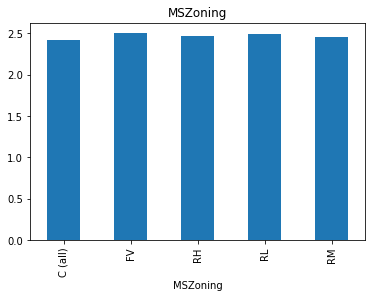

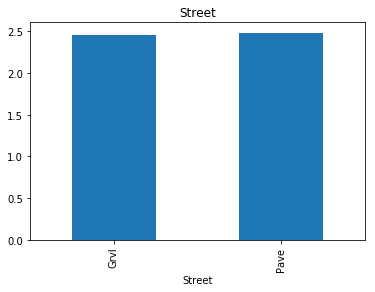

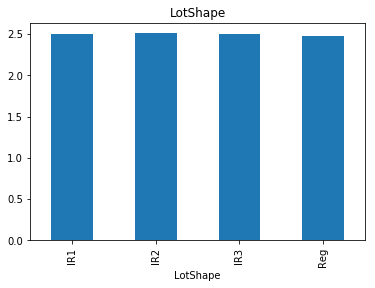

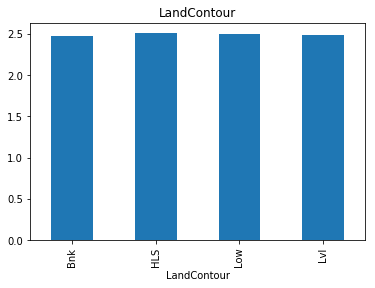

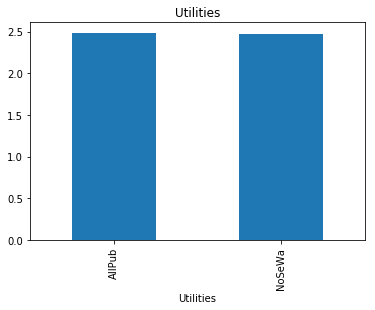

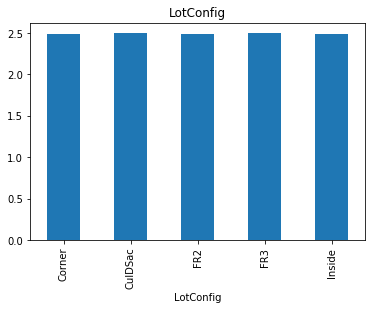

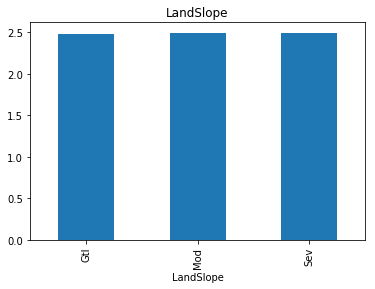

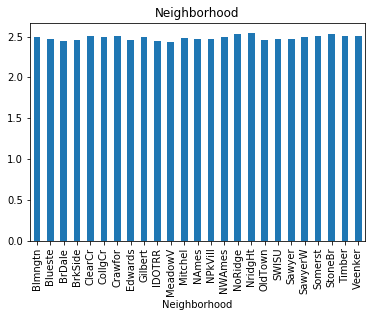

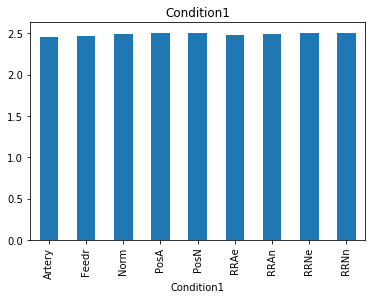

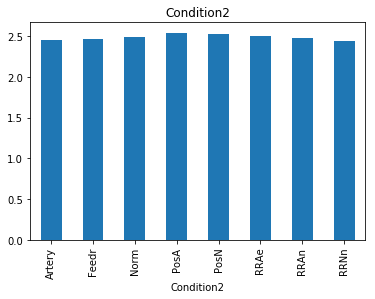

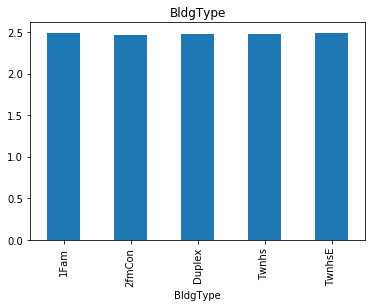

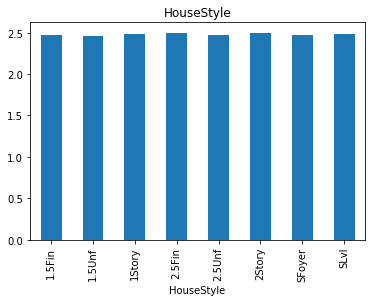

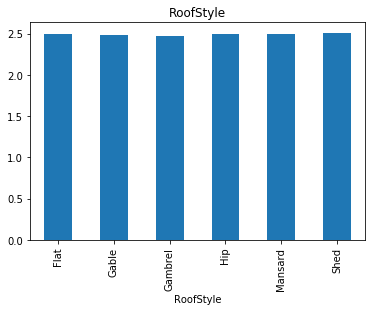

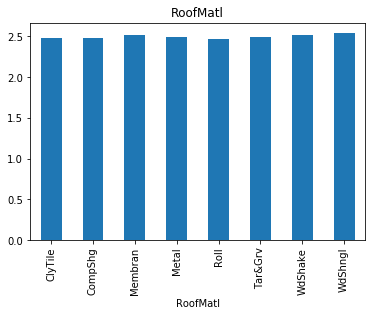

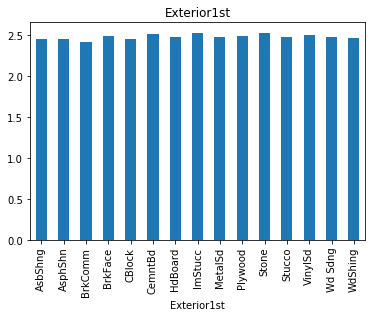

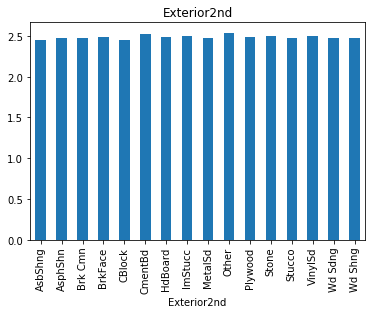

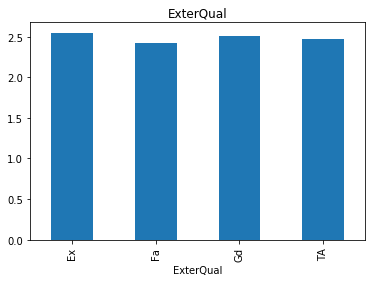

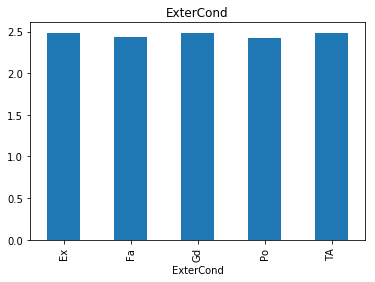

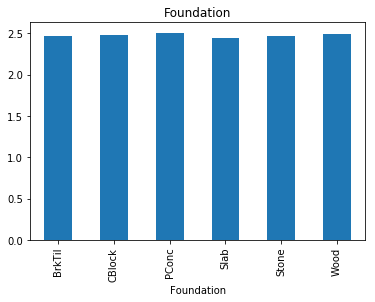

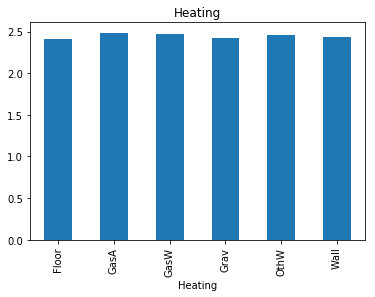

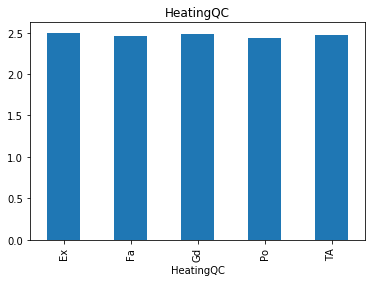

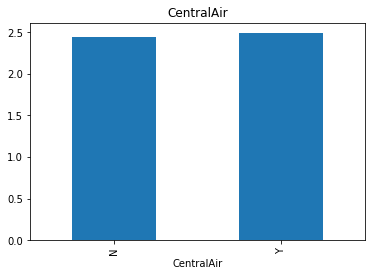

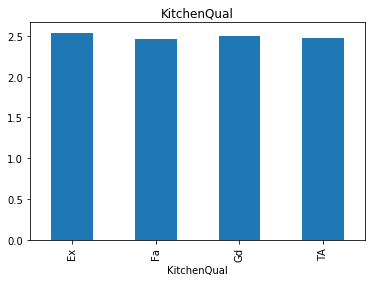

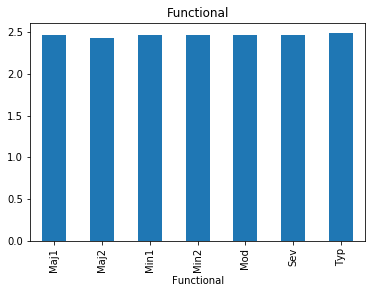

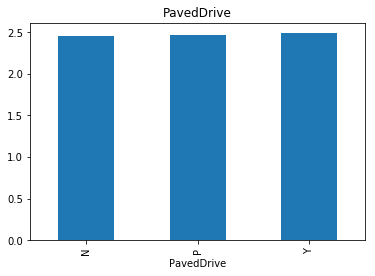

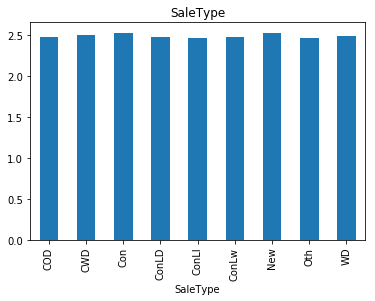

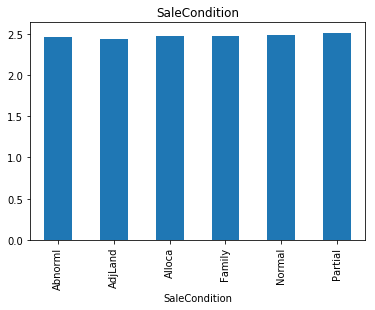

In [19]:
# plot the distribution wrt to the sales
for feature in catergorical_feature:
    data = data.copy()
    data1 = data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()